In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns1

In [123]:
def make_meshgrid(x, y, h=.02):
    d = 0.5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [124]:
def plot_contours(ax, func, x, y, **params):
    xx, yy = make_meshgrid(x,y)
    
    # ravel - раскрыть многомерный массив в одномерный, c_ - сделать zip двух одномерных массиов для получения всех возможных координат точек 
    Z = func(np.c_[xx.ravel(), yy.ravel()]) # Получаем массив из значений в каждой точке. Его нужно преобразовать в 2мерный => reshape
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [125]:
iris = datasets.load_iris()
values = iris['data'][iris.target!=0][:, :2] # first two columns
targets = iris['target'][iris.target!=0]

Выделить необходимые данные
1. for x in df_grouped.groups - для каждого класса
2. df_grouped.get_group(x).drop("name", axis=1) - отброся имя класса (axis=1 значит колонка)

In [126]:
df = pd.DataFrame(values, columns = iris['feature_names'][:2])
# df['target'] = targets
df['name'] = np.array(iris['target_names'][x] for x in targets)
df_grouped = df.groupby('name')
versicolor_df, virginica_df = [df_grouped.get_group(x).drop("name", axis=1) for x in df_grouped.groups]

Вычислем векторы средних значений

In [127]:
versicolor_mean, virginica_mean = versicolor_df.agg(['mean']).to_numpy(), virginica_df.agg(['mean']).to_numpy()

#versicolor_mean, virginica_mean

Получаем ковариационные матрицы для обоих классов и сделать необходимые преобразования

In [128]:
versicolor_matrix, virginica_matrix = versicolor_df.cov().to_numpy(), virginica_df.cov().to_numpy()

versicolor_matrix_inv = np.linalg.inv(versicolor_matrix)
virginica_matrix_inv = np.linalg.inv(virginica_matrix)

versicolor_det = np.linalg.det(versicolor_matrix)
virginica_det = np.linalg.det(virginica_matrix)

# np.matmul(versicolor_matrix_inv, versicolor_matrix)

Задаём разделяющую функцию

* Versicolor - 1-ый класс
* Virginica - 2-ой класс

In [138]:
P1 = len(versicolor_df.index) / len(df.index) # оценка вероятности того, что случайный цветок - Versicolor
P2 = len(virginica_df.index) / len(df.index)

A = virginica_matrix_inv - versicolor_matrix_inv

versicolor_mul = np.matmul(versicolor_mean, versicolor_matrix_inv)
virginica_mul = np.matmul(virginica_mean, virginica_matrix_inv)
b = 2 * versicolor_mul - 2 * virginica_mul

c = np.matmul(virginica_mul, np.transpose(virginica_mean)) - np.matmul(versicolor_mul, np.transpose(versicolor_mean)) + np.log(virginica_det) - np.log(versicolor_det) + 2 * np.log(P1) - 2 * np.log(P2)
l = lambda x: (np.matmul(np.matmul(x, A), np.transpose(x)) + np.matmul(b, np.transpose(x)) + c) * 1/2

f = lambda x: 1 if l(x) >= 0 else 2

# print(np.array(list(map(f, values))))

NameError: name 'title' is not defined

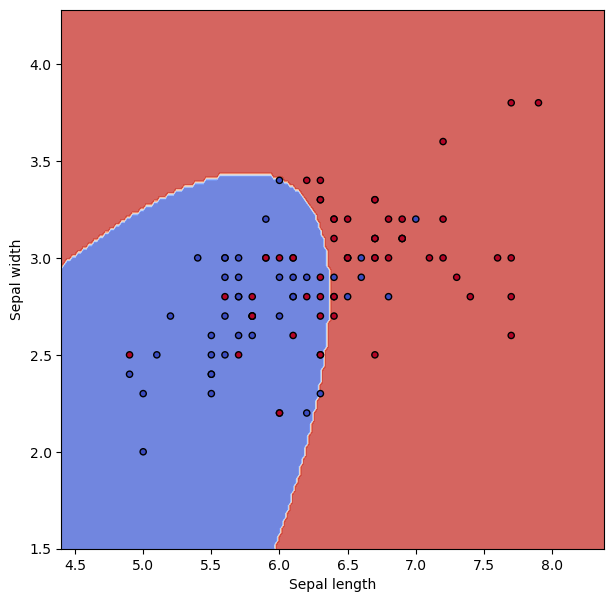

In [140]:
# Set-up 1x1 grid for plotting.
fig, ax = plt.subplots(1, 1, figsize=(7,7))

sepal_lengths = values[:, 0]
sepal_widths = values[:, 1]

plot_contours(ax, lambda vals: np.array(list(map(f,vals))), sepal_lengths, sepal_widths, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(sepal_lengths, sepal_widths, c=targets, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
#ax.set_xticks(())
#ax.set_yticks(())
ax.set_title("My ")

plt.show()